# ARIMA and Seasonal ARIMA
## Autoregressive Integrated Moving Averages 
#### The general process for ARIMA model is following:
- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA or Seasonal ARIMA based on the data 
- Use the model to make predictions

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   105 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [9]:
df.columns = ['Month', 'Sales']

In [10]:
df['Month'] = pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
df.set_index('Month', inplace=True)

In [13]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Axes: xlabel='Month'>

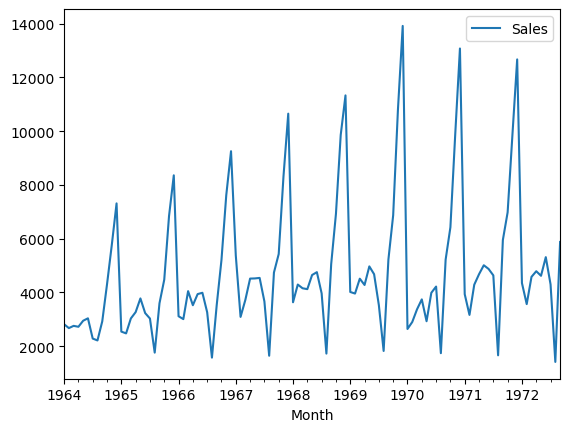

In [14]:
## the data looks seasonal
df.plot()

In [15]:
### testing for stationary 

from statsmodels.tsa.stattools import adfuller

In [16]:
test_result = adfuller(df['Sales'])

In [17]:
## H0: It is non stationary 
## H1: It is stationry 

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ["ADF Test Statistic", "p-values", "#Lags Used", "Number of Observation Used"]
    for value, label in zip(result, labels): 
        print(label + ":" + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0),reject the null hypothesis, Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time searies has a unit root, indiacating it is non-stationary")

In [18]:
adfuller_test(df['Sales'])

ADF Test Statistic:-1.8335930563276248
p-values:0.363915771660244
#Lags Used:11
Number of Observation Used:93
weak evidence against null hypothesis, time searies has a unit root, indiacating it is non-stationary


## Differencing

### We do differencing to make the data seasonal 


In [19]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [20]:
df.head(13)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [21]:
df.tail(10)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1971-12-01,12670.0,2819.0,-406.0
1972-01-01,4348.0,-8322.0,414.0
1972-02-01,3564.0,-784.0,402.0
1972-03-01,4577.0,1013.0,291.0
1972-04-01,4788.0,211.0,112.0
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0
1972-08-01,1413.0,-2885.0,-246.0


In [22]:
adfuller_test(df["Seasonal First Difference"].dropna())

ADF Test Statistic:-7.626619157213163
p-values:2.060579696813685e-11
#Lags Used:0
Number of Observation Used:92
Strong evidence against the null hypothesis(H0),reject the null hypothesis, Data has no unit root and is stationary


In [23]:
adfuller_test(df["Sales First Difference"].dropna())

ADF Test Statistic:-7.189896448051017
p-values:2.5196204473868427e-10
#Lags Used:11
Number of Observation Used:92
Strong evidence against the null hypothesis(H0),reject the null hypothesis, Data has no unit root and is stationary


<Axes: xlabel='Month'>

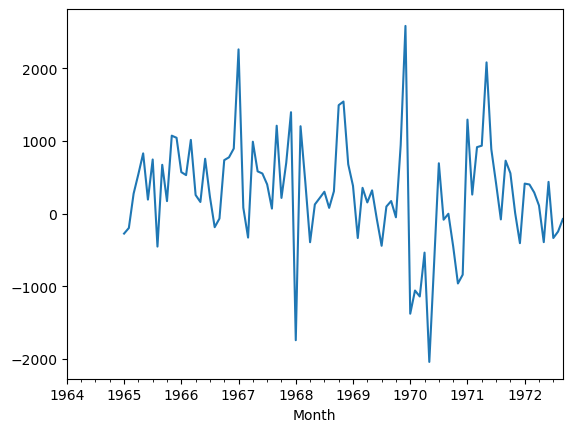

In [24]:
df["Seasonal First Difference"].plot()

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [25]:
# df['Seasonal First Difference'].iloc[13:]

C:\Users\Ahmed Ali\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


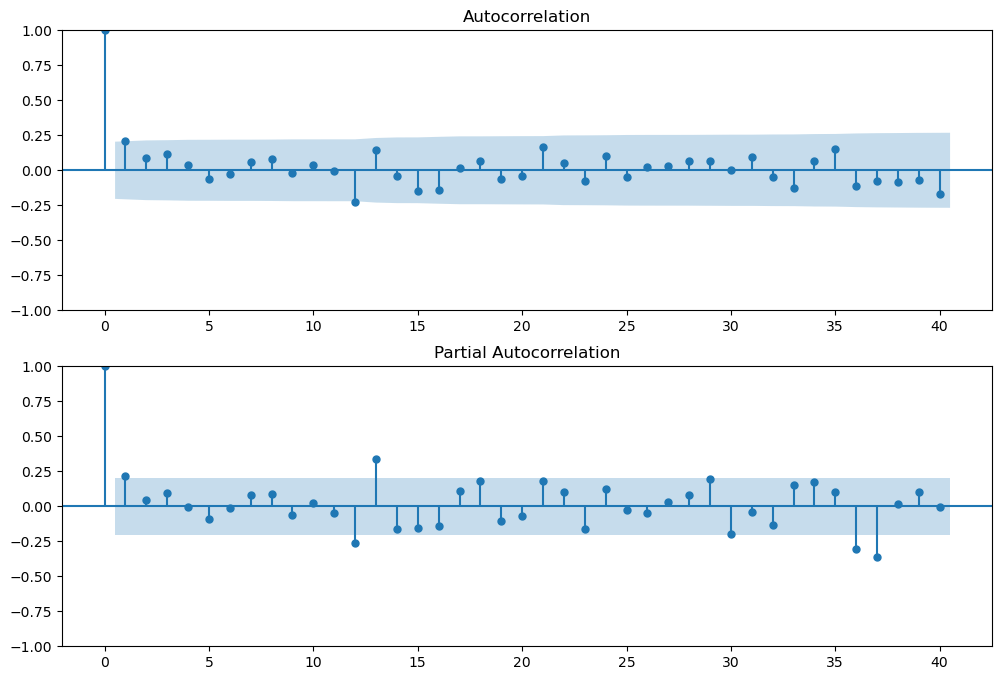

In [26]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [27]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [28]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Ahmed Ali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ahmed Ali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ahmed Ali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 06 Jan 2025   AIC                           1911.627
Time:                        14:38:58   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.998      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.305      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

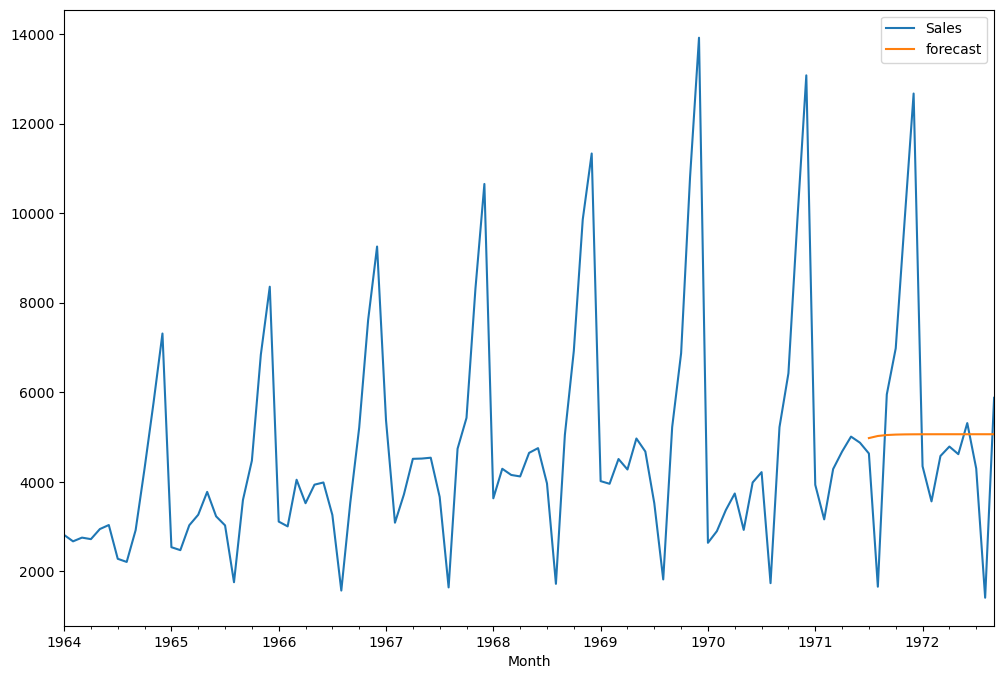

In [30]:
df['forecast']=model_fit.predict(start=90,end=105,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

#### We can clearly see that Arima is not the best Model for seasonal data 

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [34]:
model=SARIMAX (df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Ahmed Ali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ahmed Ali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

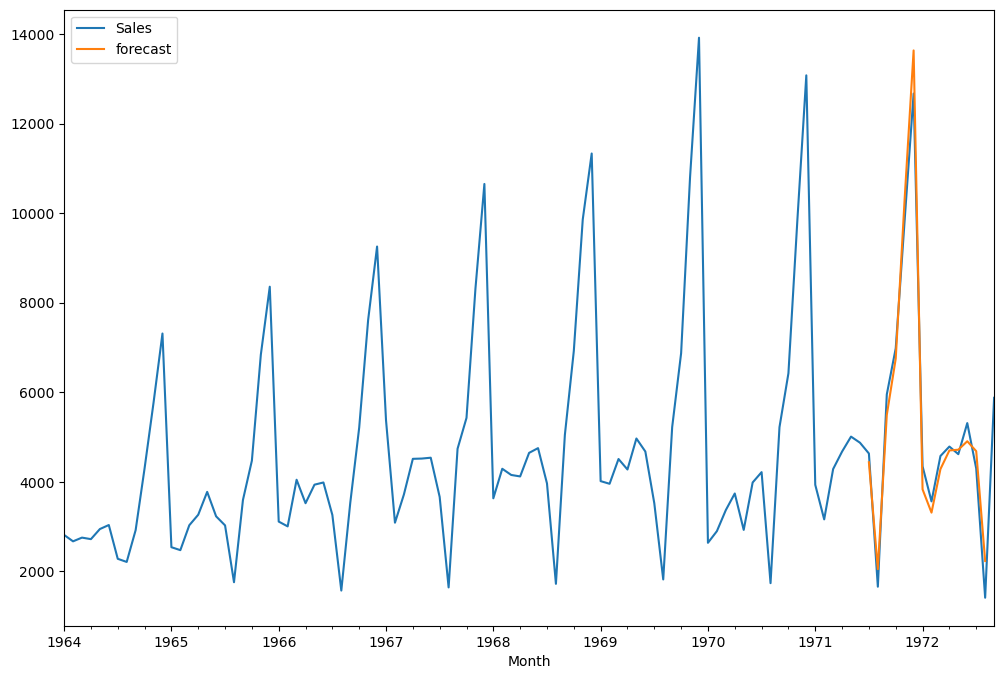

In [35]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))